In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#모든 열 보기
pd.set_option('display.max_columns', None)

In [3]:
path = 'D:/Dataset/Competitons/Jeju/'
train = pd.read_csv(path + 'train.csv', parse_dates=["base_date"]).copy()
test = pd.read_csv(path + 'test.csv', parse_dates=["base_date"]).copy()
origin_train = train.copy()
sample_submission = pd.read_csv(path + '/sample_submission.csv').copy()

In [4]:
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,2022-03-31,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [5]:
# 수 확인
def val_count_df(df, column_name, sort_by_column_name=False):
    value_count = df[column_name].value_counts().reset_index().rename(columns={column_name:"Value Count","index":column_name}).set_index(column_name)
    value_count["Percentage"] = df[column_name].value_counts(normalize=True)*100
    value_count = value_count.reset_index()
    if sort_by_column_name:
        value_count = value_count.sort_values(column_name)
    return value_count

def plot_and_display_valuecounts(df, column_name, sort_by_column_name=False):
    val_count = val_count_df(df, column_name, sort_by_column_name)
    #display(val_count)
    val_count.set_index(column_name).plot.pie(y="Value Count", figsize=(5,5), legend=False, ylabel="");

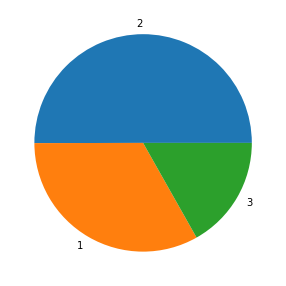

In [6]:
plot_and_display_valuecounts(train, 'lane_count')

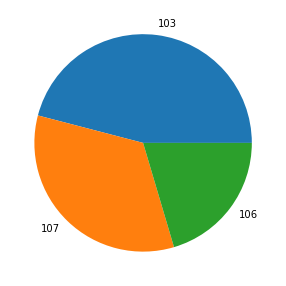

In [7]:
plot_and_display_valuecounts(train, 'road_rating')

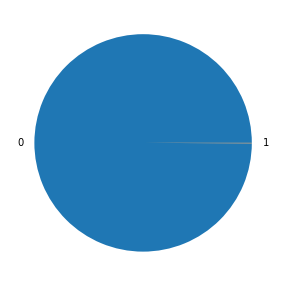

In [8]:
plot_and_display_valuecounts(train, 'multi_linked')

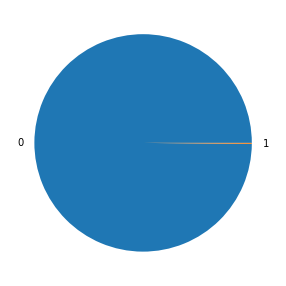

In [9]:
plot_and_display_valuecounts(train, 'road_in_use')

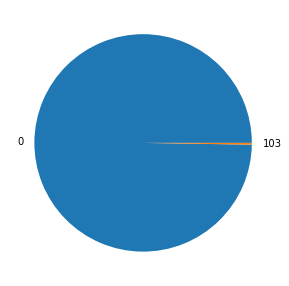

In [10]:
plot_and_display_valuecounts(train, 'connect_code')

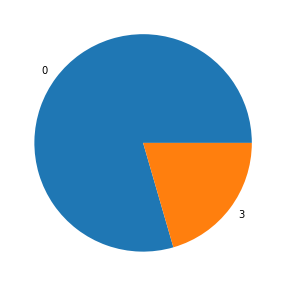

In [11]:
plot_and_display_valuecounts(train, 'road_type')

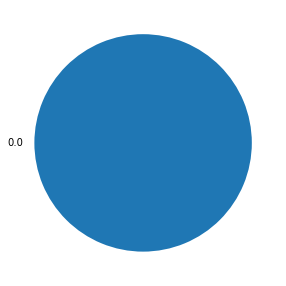

In [12]:
plot_and_display_valuecounts(train, 'vehicle_restricted')

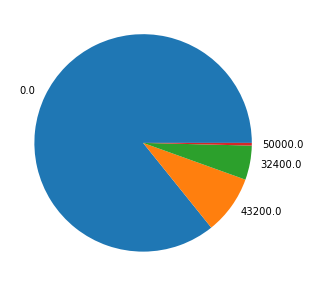

In [13]:
plot_and_display_valuecounts(train, 'weight_restricted')

In [63]:
from sklearn.preprocessing import LabelEncoder
def Label_encoder(df):
    df['day_of_week'] = LabelEncoder().fit_transform(df['day_of_week'])
    df['road_name'] = LabelEncoder().fit_transform(df['road_name'])
    df['start_node_name'] = LabelEncoder().fit_transform(df['start_node_name'])
    df['start_turn_restricted'] = LabelEncoder().fit_transform(df['start_turn_restricted'])
    df['end_node_name'] = LabelEncoder().fit_transform(df['end_node_name'])
    df['end_turn_restricted'] = LabelEncoder().fit_transform(df['end_turn_restricted'])

    return df

In [64]:
train = Label_encoder(train)
test = Label_encoder(test)

변수명,변수 설명
1. id,아이디
2. base_date,날짜
3. day_of_week,요일
4. base_hour,시간대
5. road_in_use,도로사용여부
6. lane_count,차로수
7. road_rating,도로등급
8. multi_linked,중용구간 여부
9. connect_code,연결로 코드
10. maximum_speed_limit,최고속도제한
11. weight_restricted,통과제한하중
12. hight_restricted,통과제한높이
13. road_type,도로유형
14. start_latitude,시작지점의 위도
15. start_longitude,시작지점의 경도
16. start_turn_restricted,시작 지점의 회전제한 유무
17. end_latitude,도착지점의 위도
18. end_longitude,도착지점의 경도
19. end_turn_restricted,도작지점의 회전제한 유무
20. road_name,도로명
21. start_node_name,시작지점명
22. end_node_name,도착지점명
23. vehicle_restricted,통과제한차량
24. target,평균속도(km)

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id                     object        
 1   base_date              datetime64[ns]
 2   day_of_week            int32         
 3   base_hour              int64         
 4   road_in_use            int64         
 5   lane_count             int64         
 6   road_rating            int64         
 7   road_name              int32         
 8   multi_linked           int64         
 9   connect_code           int64         
 10  maximum_speed_limit    float64       
 11  vehicle_restricted     float64       
 12  weight_restricted      float64       
 13  height_restricted      float64       
 14  road_type              int64         
 15  start_node_name        int32         
 16  start_latitude         float64       
 17  start_longitude        float64       
 18  start_turn_restricted 

In [66]:
train.isna().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
road_in_use              0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [67]:
test

,id,base_date,day_of_week,base_hour,road_in_use,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,2022-08-25,1,17,0,3,107,27,0,0,70.0,0.0,0.0,0.0,0,79,33.499427,126.541298,0,208,33.500772,126.543837,1
1,TEST_000001,2022-08-09,6,12,0,2,103,30,0,0,70.0,0.0,0.0,0.0,3,211,33.258507,126.427003,0,9,33.258119,126.415840,0
2,TEST_000002,2022-08-05,0,2,0,1,103,31,0,0,60.0,0.0,0.0,0.0,0,45,33.258960,126.476508,0,45,33.259206,126.474687,0
3,TEST_000003,2022-08-18,1,23,0,3,103,29,0,0,70.0,0.0,0.0,0.0,0,129,33.473494,126.545647,0,180,33.471061,126.545467,0
4,TEST_000004,2022-08-10,2,17,0,3,106,11,0,0,70.0,0.0,0.0,0.0,0,73,33.501477,126.569223,0,72,33.496863,126.581230,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291236,TEST_291236,2022-08-27,5,5,0,1,103,31,0,0,80.0,0.0,0.0,0.0,0,168,33.472819,126.463030,0,41,33.470483,126.460846,0
291237,TEST_291237,2022-08-19,0,20,0,2,103,29,0,0,60.0,0.0,0.0,0.0,0,140,33.305359,126.598914,0,230,33.300796,126.600332,0
291238,TEST_291238,2022-08-05,0,11,0,1,107,20,0,0,30.0,0.0,0.0,0.0,0,59,33.493624,126.496769,1,227,33.497500,126.496946,1
291239,TEST_291239,2022-08-12,0,7,0,2,107,1,0,0,60.0,0.0,0.0,0.0,0,16,33.254782,126.507014,0,176,33.255659,126.507333,0


In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291241 entries, 0 to 291240
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     291241 non-null  object        
 1   base_date              291241 non-null  datetime64[ns]
 2   day_of_week            291241 non-null  int32         
 3   base_hour              291241 non-null  int64         
 4   road_in_use            291241 non-null  int64         
 5   lane_count             291241 non-null  int64         
 6   road_rating            291241 non-null  int64         
 7   road_name              291241 non-null  int32         
 8   multi_linked           291241 non-null  int64         
 9   connect_code           291241 non-null  int64         
 10  maximum_speed_limit    291241 non-null  float64       
 11  vehicle_restricted     291241 non-null  float64       
 12  weight_restricted      291241 non-null  floa

In [69]:
test.isna().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
road_in_use              0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
dtype: int64

In [75]:
for i in range(0, len(train.columns)):
    print(len(train[str(train.columns[i])].unique()), train.columns[i])

4701217 id
281 base_date
7 day_of_week
24 base_hour
2 road_in_use
3 lane_count
3 road_rating
61 road_name
2 multi_linked
2 connect_code
6 maximum_speed_limit
1 vehicle_restricted
4 weight_restricted
1 height_restricted
2 road_type
487 start_node_name
586 start_latitude
586 start_longitude
2 start_turn_restricted
487 end_node_name
586 end_latitude
586 end_longitude
2 end_turn_restricted
102 target


제주도는 vehicle_restricted & height_restricted가 없는듯

In [70]:
corr_matrix = train.corr()
corr_matrix['target'].sort_values(ascending=False)

target                   1.000000
maximum_speed_limit      0.425715
weight_restricted        0.294092
road_type                0.200840
road_name                0.116778
connect_code             0.048348
end_node_name            0.039770
start_latitude           0.036280
end_latitude             0.036139
start_node_name          0.029007
road_in_use              0.026095
day_of_week              0.006397
end_longitude           -0.001000
start_longitude         -0.001168
multi_linked            -0.008408
lane_count              -0.144256
start_turn_restricted   -0.156121
base_hour               -0.159407
end_turn_restricted     -0.162815
road_rating             -0.261693
vehicle_restricted            NaN
height_restricted             NaN
Name: target, dtype: float64

<AxesSubplot:>

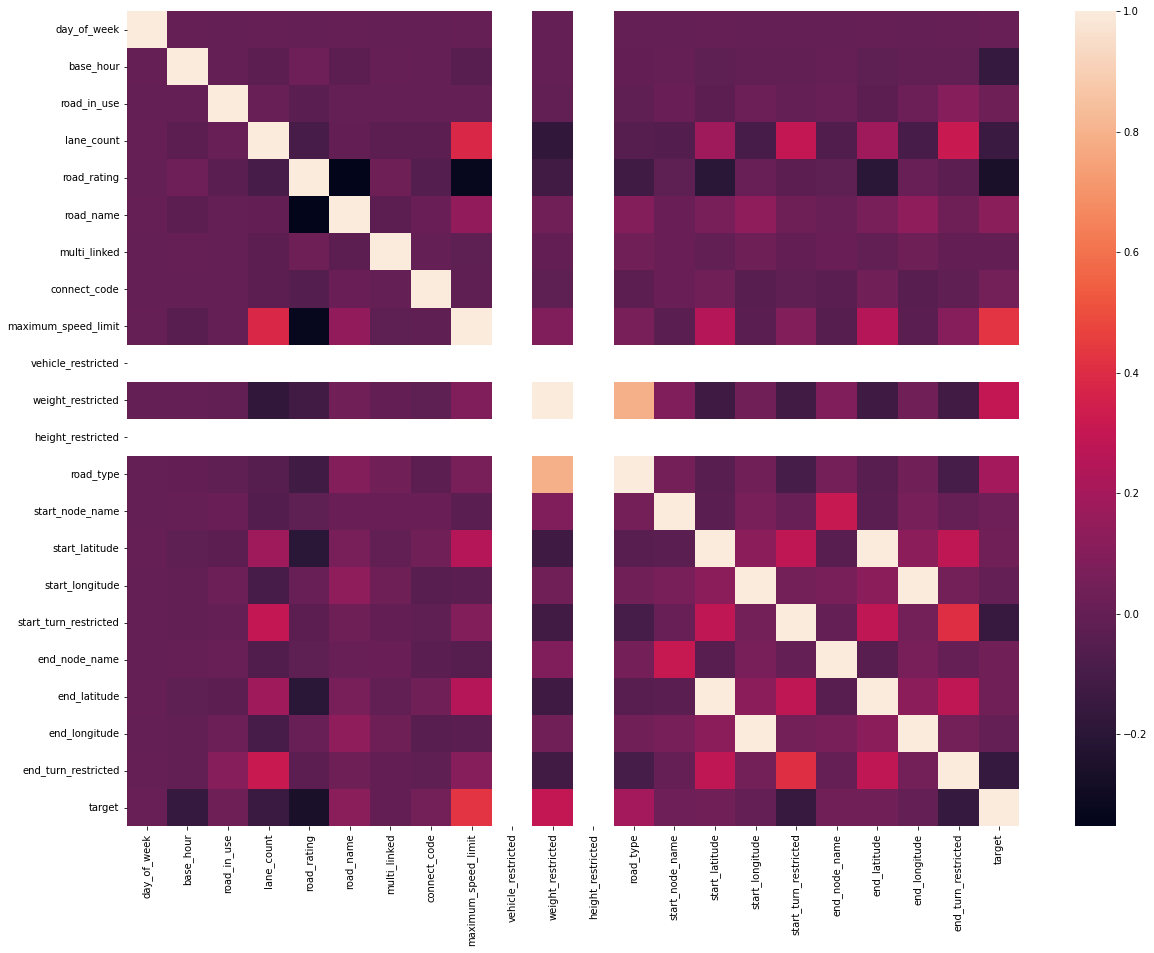

In [151]:
f, ax = plt.subplots(figsize = (20, 15))
sns.heatmap(corr_matrix)

In [104]:
train.sort_values(by=['base_date'])

,id,base_date,day_of_week,base_hour,road_in_use,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
430379,TRAIN_0430379,2021-09-01,2,16,0,3,106,53,0,0,70.0,0.0,0.0,0.0,3,421,33.518987,126.568861,1,110,33.519726,126.571488,0,37.0
369019,TRAIN_0369019,2021-09-01,2,11,0,1,103,36,0,0,50.0,0.0,0.0,0.0,0,129,33.312509,126.703863,0,455,33.312449,126.696173,0,36.0
1132647,TRAIN_1132647,2021-09-01,2,4,0,2,103,35,0,0,80.0,0.0,0.0,0.0,0,267,33.462214,126.326551,0,269,33.462677,126.330152,0,43.0
4543127,TRAIN_4543127,2021-09-01,2,16,0,1,107,0,0,0,60.0,0.0,0.0,0.0,0,201,33.331742,126.676431,0,456,33.325096,126.665698,0,55.0
3428956,TRAIN_3428956,2021-09-01,2,9,0,1,103,36,0,0,50.0,0.0,32400.0,0.0,3,336,33.260056,126.490987,0,337,33.259995,126.491306,0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053638,TRAIN_2053638,2022-07-31,4,21,0,1,107,42,0,0,50.0,0.0,0.0,0.0,0,254,33.251716,126.425612,0,414,33.251884,126.423200,0,21.0
2748124,TRAIN_2748124,2022-07-31,4,12,0,3,107,32,0,0,70.0,0.0,0.0,0.0,0,370,33.508464,126.558231,0,12,33.507349,126.556173,1,36.0
2447938,TRAIN_2447938,2022-07-31,4,12,0,2,107,1,0,0,60.0,0.0,0.0,0.0,0,252,33.253074,126.506393,0,204,33.252183,126.506069,0,24.0
3749761,TRAIN_3749761,2022-07-31,4,1,0,2,103,36,0,0,60.0,0.0,0.0,0.0,0,206,33.264112,126.554043,0,207,33.263685,126.550978,0,37.0


### maximum_speed_limit

In [97]:
train_max_speed = train.groupby(['road_name', 'maximum_speed_limit'])['target'].sum().reset_index()
train_max_speed

,road_name,maximum_speed_limit,target
0,0,30.0,2484583.0
1,0,50.0,7550513.0
2,0,60.0,7271916.0
3,0,70.0,1234388.0
4,0,80.0,6956053.0
...,...,...,...
90,56,50.0,788264.0
91,57,50.0,3231799.0
92,58,60.0,272329.0
93,59,30.0,18835.0


In [98]:
train_max_speed_count = train.groupby(['road_name', 'maximum_speed_limit'])['target'].count().reset_index()
train_max_speed_count

,road_name,maximum_speed_limit,target
0,0,30.0,64647
1,0,50.0,199986
2,0,60.0,168030
3,0,70.0,20778
4,0,80.0,116022
...,...,...,...
90,56,50.0,16684
91,57,50.0,129117
92,58,60.0,11973
93,59,30.0,587


In [99]:
train_max_speed['target'] = train_max_speed['target'] / train_max_speed_count['target']
# train_max_speed = train_max_speed.pivot(index = 'road_name', columns = 'maximum_speed_limit', values = 'target')
train_max_speed

,road_name,maximum_speed_limit,target
0,0,30.0,38.433075
1,0,50.0,37.755208
2,0,60.0,43.277486
3,0,70.0,59.408413
4,0,80.0,59.954603
...,...,...,...
90,56,50.0,47.246703
91,57,50.0,25.030004
92,58,60.0,22.745260
93,59,30.0,32.086882


In [100]:
train_max_speed['maximum_speed_limit'].unique()

array([30., 50., 60., 70., 80., 40.])

<AxesSubplot:xlabel='road_name', ylabel='target'>

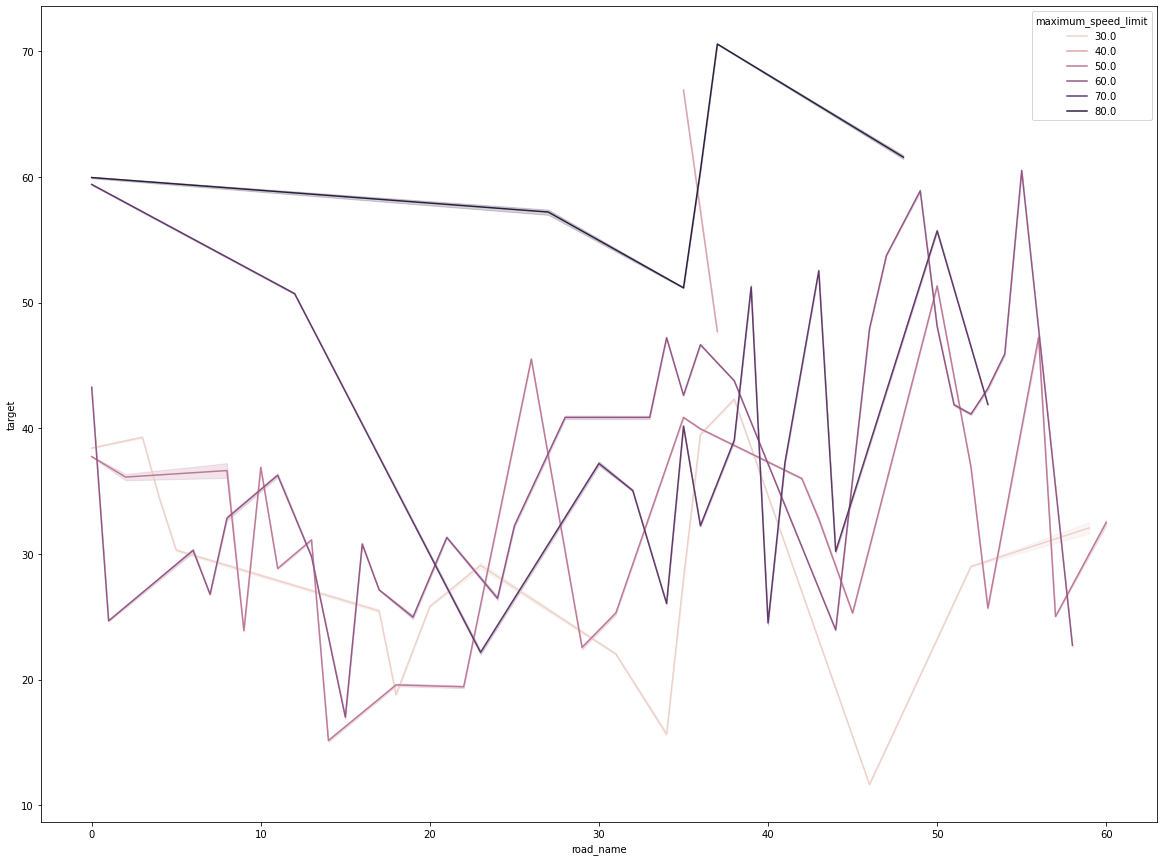

In [140]:
f, axes = plt.subplots(figsize = (20, 15))
sns.lineplot(data = train, x = 'road_name', y = 'target', hue = 'maximum_speed_limit')

<AxesSubplot:xlabel='road_name', ylabel='target'>

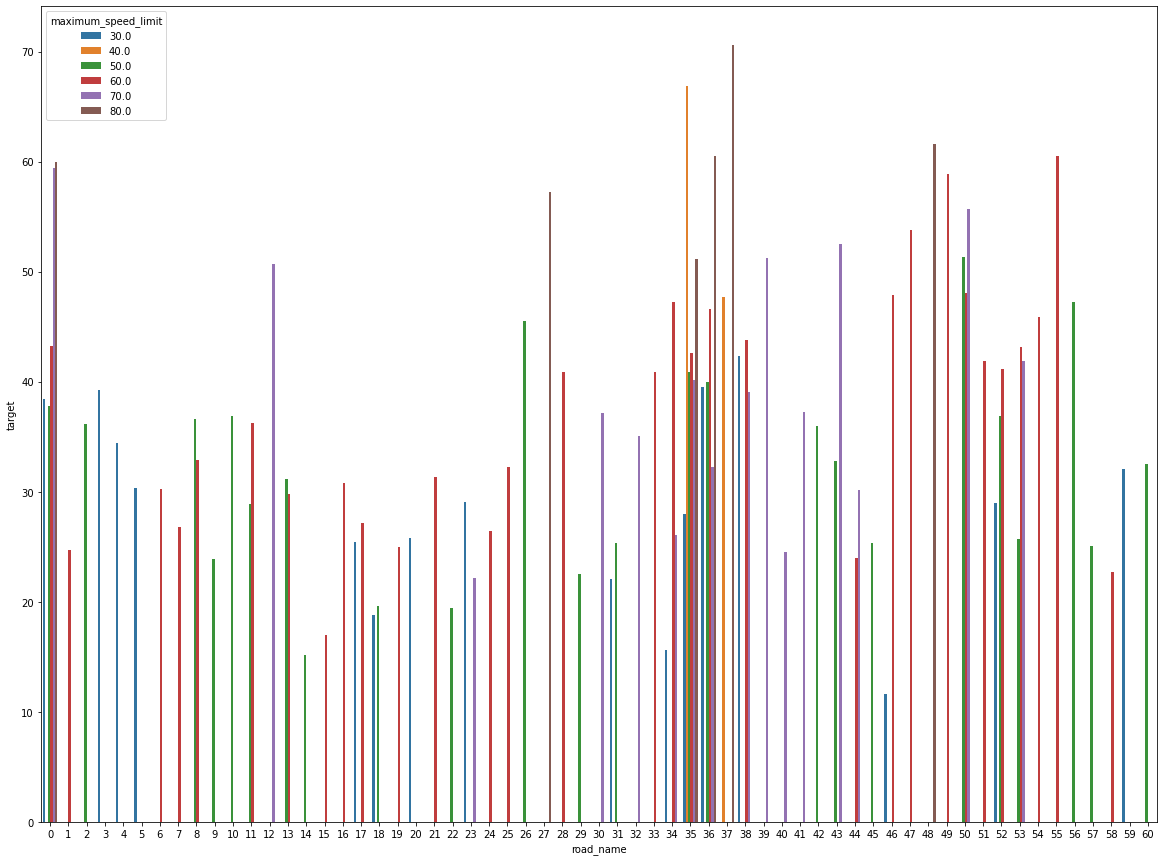

In [102]:
f, axes = plt.subplots(figsize = (20, 15))
sns.barplot(data = train_max_speed, x = 'road_name', y = 'target', hue = 'maximum_speed_limit')

<AxesSubplot:xlabel='base_date', ylabel='target'>

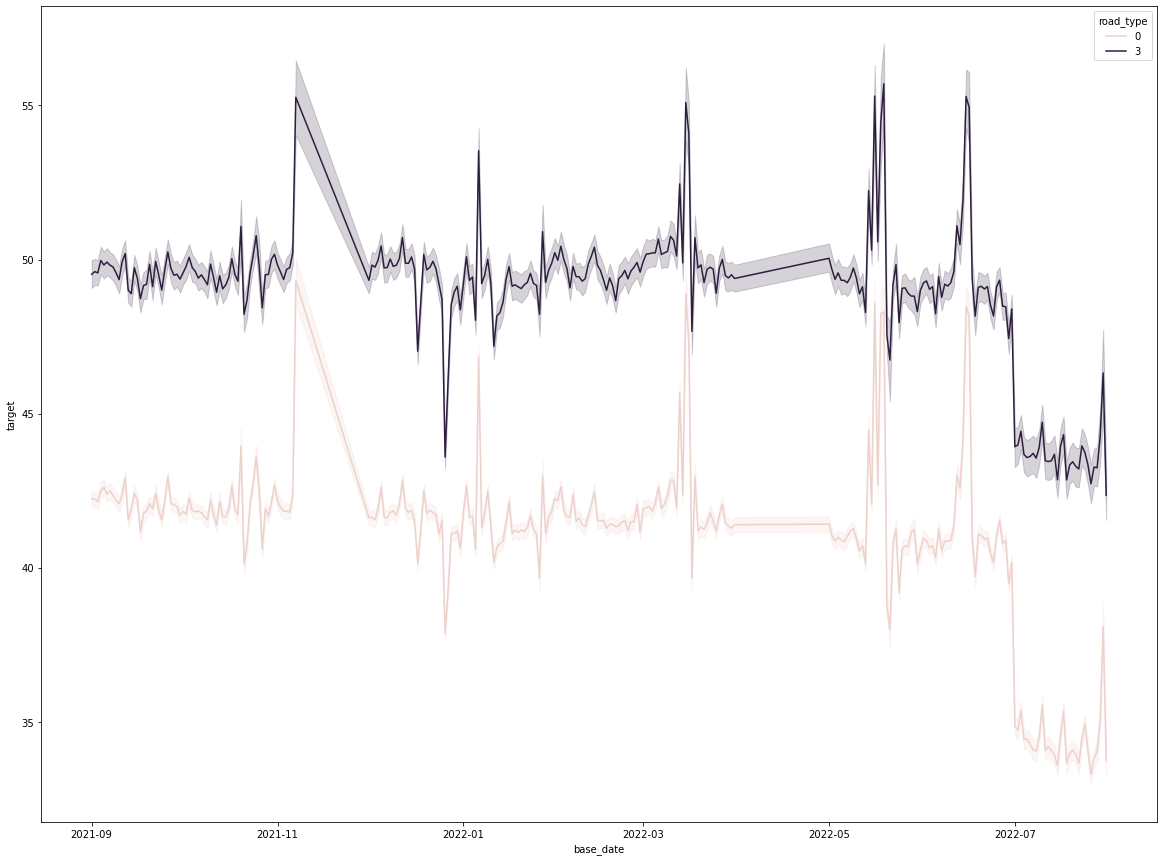

In [77]:
f, axes = plt.subplots(figsize = (20, 15))
sns.lineplot(data = train, x = 'base_date', y = 'target', hue = 'road_type')

In [165]:
start_train = train.groupby(['start_latitude', 'start_longitude'])['target'].sum().reset_index()
start_train

,start_latitude,start_longitude,target
0,33.243432,126.422025,211790.0
1,33.244512,126.427069,171287.0
2,33.244601,126.562080,288752.0
3,33.244871,126.564407,279546.0
4,33.244882,126.419089,433104.0
...,...,...,...
581,33.551585,126.769385,488665.0
582,33.553525,126.739714,205467.0
583,33.554302,126.738379,515807.0
584,33.555316,126.736681,199108.0


<AxesSubplot:xlabel='start_longitude', ylabel='start_latitude'>

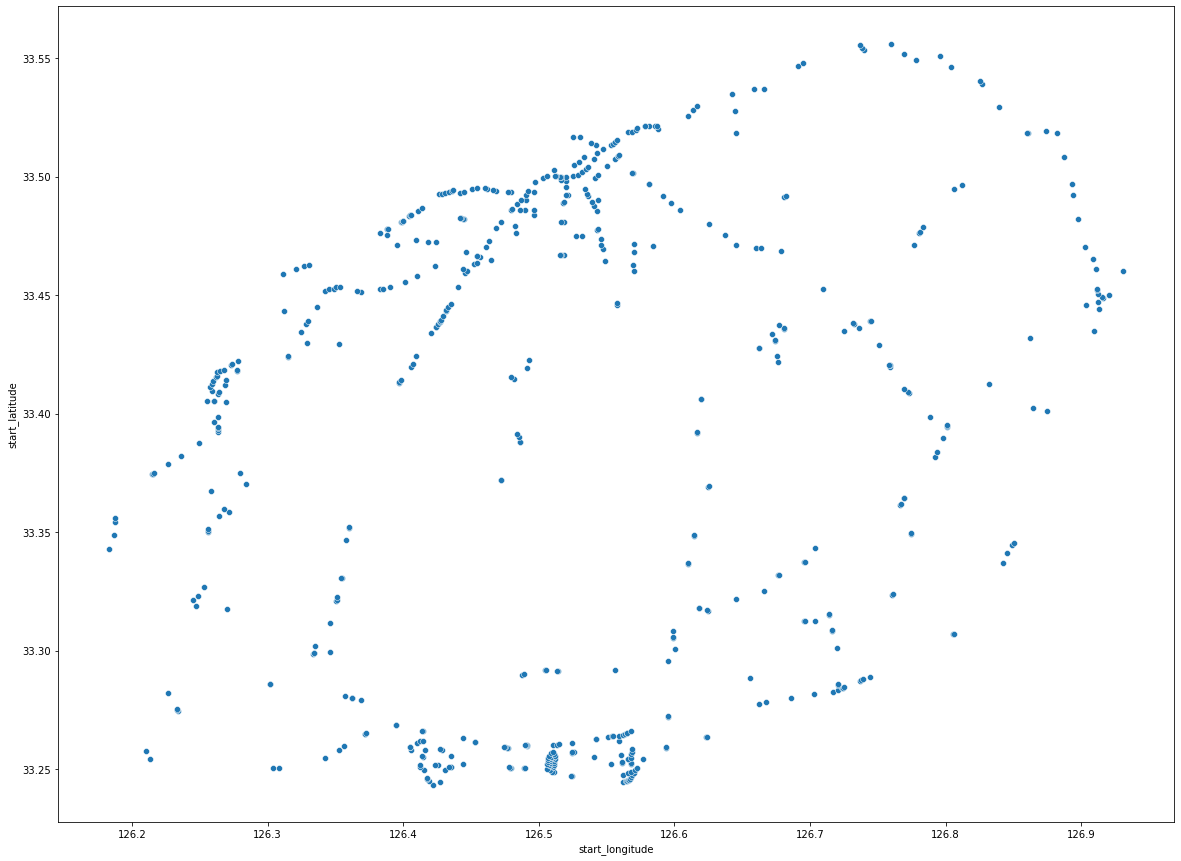

In [172]:
f, axes = plt.subplots(figsize = (20, 15))
sns.scatterplot(data = start_train, x="start_longitude", y="start_latitude")

In [160]:
train_see = train.copy()
train_see = train.drop(['vehicle_restricted', 'height_restricted', 'start_latitude', 'start_longitude', 'end_latitude', 'end_longitude'], axis = 1)
train_see

,id,base_date,day_of_week,base_hour,road_in_use,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_node_name,start_turn_restricted,end_node_name,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,1,17,0,1,106,46,0,0,60.0,32400.0,3,386,0,386,0,52.0
1,TRAIN_0000001,2022-07-28,1,21,0,2,103,34,0,0,60.0,0.0,0,32,1,2,0,30.0
2,TRAIN_0000002,2021-10-10,4,7,0,2,103,36,0,0,80.0,0.0,0,426,0,179,0,61.0
3,TRAIN_0000003,2022-03-11,0,13,0,2,107,57,0,0,50.0,0.0,0,58,0,203,0,20.0
4,TRAIN_0000004,2021-10-05,6,8,0,2,103,35,0,0,80.0,0.0,0,267,0,269,0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,1,16,0,1,107,0,0,0,50.0,0.0,0,79,0,42,0,20.0
4701213,TRAIN_4701213,2022-03-31,1,2,0,2,107,0,0,0,80.0,43200.0,3,31,0,31,0,65.0
4701214,TRAIN_4701214,2022-06-13,3,22,0,2,103,35,0,0,60.0,0.0,0,19,0,214,0,30.0
4701215,TRAIN_4701215,2021-10-20,2,2,0,2,103,37,0,0,80.0,0.0,0,392,0,23,0,73.0


<AxesSubplot:>

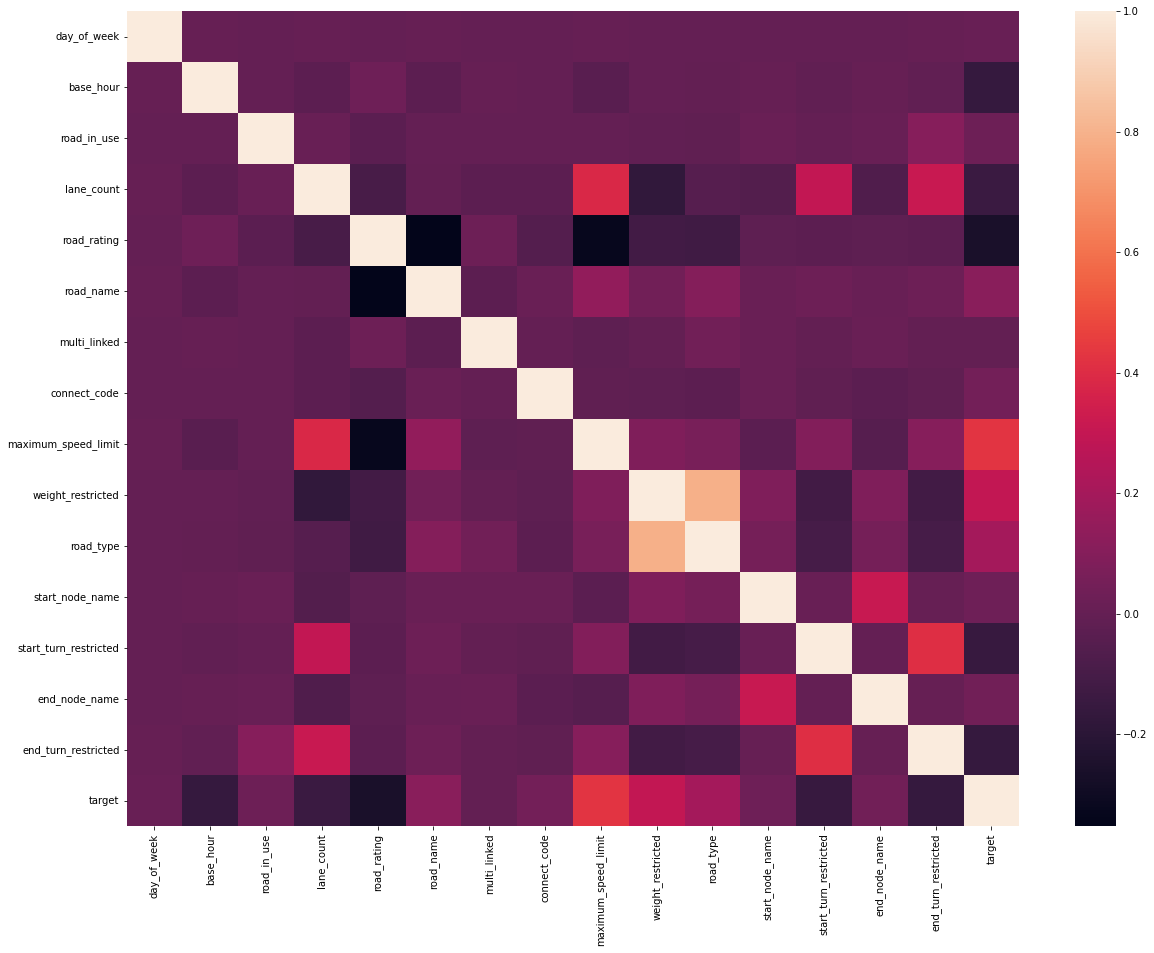

In [161]:
corr_matrix = train_see.corr()
f, ax = plt.subplots(figsize = (20, 15))
sns.heatmap(corr_matrix)

In [162]:
corr_matrix['target'].sort_values(ascending=False)

target                   1.000000
maximum_speed_limit      0.425715
weight_restricted        0.294092
road_type                0.200840
road_name                0.116778
connect_code             0.048348
end_node_name            0.039770
start_node_name          0.029007
road_in_use              0.026095
day_of_week              0.006397
multi_linked            -0.008408
lane_count              -0.144256
start_turn_restricted   -0.156121
base_hour               -0.159407
end_turn_restricted     -0.162815
road_rating             -0.261693
Name: target, dtype: float64

In [111]:
train_see = train.groupby(['lane_count', 'road_name'])['target'].count().reset_index()
train_see = train_see.pivot(index = 'lane_count', columns = 'road_name', values = 'target')
train_see
#같은 도로인데 차로수가 차이나는 것은? 상행 하행인가..?

road_name,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
lane_count,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,245684.0,NaN,NaN,10706.0,NaN,23116.0,NaN,NaN,6813.0,10603.0,NaN,NaN,NaN,33001.0,NaN,NaN,NaN,NaN,5817.0,4942.0,32320.0,NaN,NaN,5983.0,NaN,7342.0,7718.0,NaN,NaN,NaN,NaN,6049.0,NaN,NaN,91252.0,105671.0,292087.0,1461.0,63044.0,NaN,NaN,NaN,51659.0,NaN,NaN,30509.0,108777.0,70282.0,NaN,8677.0,64682.0,29523.0,78012.0,6006.0,NaN,106113.0,NaN,35303.0,11973.0,587.0,2819.0
2,323779.0,77889.0,11950.0,NaN,NaN,NaN,NaN,40341.0,NaN,NaN,NaN,78188.0,22764.0,NaN,10634.0,10116.0,11727.0,77942.0,17425.0,5238.0,NaN,NaN,10604.0,NaN,11672.0,NaN,NaN,12092.0,11835.0,12056.0,NaN,NaN,NaN,11835.0,71748.0,740756.0,179046.0,246720.0,8075.0,10647.0,10091.0,NaN,5881.0,136629.0,20476.0,NaN,NaN,NaN,10685.0,NaN,20282.0,10558.0,NaN,NaN,11913.0,NaN,16684.0,93814.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,10126.0,NaN,11962.0,NaN,NaN,NaN,12045.0,NaN,71361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34199.0,NaN,5961.0,NaN,NaN,NaN,NaN,NaN,NaN,12085.0,6044.0,60208.0,NaN,52701.0,199665.0,83377.0,NaN,11880.0,NaN,NaN,12070.0,NaN,NaN,33716.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173194.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
train_see = train.groupby(['maximum_speed_limit', 'road_name'])['target'].count().reset_index()
train_see = train_see.pivot(index = 'maximum_speed_limit', columns = 'road_name', values = 'target')
train_see
#같은 도로인데 속도제한이 4개나 있는 것은? 상행 하행인가..?

road_name,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
maximum_speed_limit,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30.0,64647.0,NaN,NaN,10706.0,10126.0,23116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10986.0,5817.0,NaN,32320.0,NaN,NaN,5983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6049.0,NaN,NaN,5992.0,6055.0,17625.0,NaN,8075.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1899.0,NaN,NaN,NaN,NaN,NaN,19778.0,NaN,NaN,NaN,NaN,NaN,NaN,587.0,NaN
40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5329.0,NaN,1461.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50.0,199986.0,NaN,11950.0,NaN,NaN,NaN,NaN,NaN,2239.0,10603.0,12045.0,67017.0,NaN,16656.0,10634.0,NaN,NaN,NaN,17425.0,NaN,NaN,NaN,10604.0,NaN,NaN,NaN,7718.0,NaN,NaN,12056.0,NaN,6044.0,NaN,NaN,NaN,221404.0,155692.0,NaN,NaN,NaN,NaN,NaN,57540.0,10400.0,NaN,30509.0,NaN,NaN,NaN,NaN,42675.0,NaN,33930.0,17935.0,NaN,NaN,16684.0,129117.0,NaN,NaN,2819.0
60.0,168030.0,77889.0,NaN,NaN,NaN,NaN,11962.0,40341.0,4574.0,NaN,NaN,11171.0,NaN,16345.0,NaN,10116.0,11727.0,66956.0,NaN,10180.0,NaN,34199.0,NaN,NaN,11672.0,7342.0,NaN,NaN,11835.0,NaN,NaN,NaN,NaN,11835.0,144986.0,254070.0,230808.0,NaN,63044.0,NaN,NaN,NaN,NaN,NaN,42164.0,NaN,106878.0,70282.0,NaN,8677.0,32148.0,40081.0,24304.0,11958.0,11913.0,106113.0,NaN,NaN,11973.0,NaN,NaN
70.0,20778.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5961.0,NaN,NaN,NaN,NaN,NaN,NaN,12085.0,NaN,60208.0,NaN,64723.0,317443.0,77361.0,NaN,11880.0,10647.0,10091.0,12070.0,NaN,126229.0,12028.0,NaN,NaN,NaN,NaN,NaN,10141.0,NaN,NaN,149307.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80.0,116022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12092.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241791.0,73024.0,246720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
train_see = train.groupby(['multi_linked', 'road_name'])['target'].count().reset_index()
train_see = train_see.pivot(index = 'multi_linked', columns = 'road_name', values = 'target')
train_see
#같은 도로인데 중용구간 여부가 2개나 있는 것은? 상행 하행인가..?

road_name,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
multi_linked,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,569463.0,77889.0,11950.0,10706.0,10126.0,23116.0,11962.0,40341.0,4574.0,10603.0,12045.0,78188.0,94125.0,33001.0,10634.0,10116.0,11727.0,77942.0,23242.0,10180.0,32320.0,34199.0,10604.0,11944.0,11672.0,7342.0,7718.0,12092.0,11835.0,12056.0,12085.0,12093.0,60208.0,11835.0,215701.0,1046092.0,554510.0,248181.0,82999.0,10647.0,10091.0,12070.0,57540.0,136629.0,54192.0,30509.0,108777.0,70282.0,10685.0,8677.0,84964.0,40081.0,78012.0,179200.0,11913.0,106113.0,16684.0,129117.0,11973.0,587.0,2819.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2239.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
train_see = train.groupby(['start_turn_restricted', 'road_name'])['target'].count().reset_index()
train_see = train_see.pivot(index = 'start_turn_restricted', columns = 'road_name', values = 'target')
train_see
#같은 도로인데 시작 지점의 회전제한 유무가 2개나 있는 것은? 상행 하행인가..?

road_name,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
start_turn_restricted,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,568991.0,77889.0,11950.0,10706.0,10126.0,23116.0,11962.0,40341.0,6813.0,10603.0,NaN,78188.0,42514.0,33001.0,5319.0,4991.0,11727.0,77942.0,17425.0,4942.0,32320.0,25681.0,5325.0,NaN,5903.0,3631.0,7718.0,12092.0,11835.0,12056.0,12085.0,6044.0,30143.0,11835.0,169202.0,922346.0,507532.0,248181.0,77072.0,10647.0,10091.0,12070.0,57540.0,115592.0,54192.0,20400.0,108777.0,70282.0,10685.0,8677.0,84964.0,40081.0,78012.0,143245.0,11913.0,106113.0,8340.0,129117.0,6010.0,587.0,2819.0
1,472.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12045.0,NaN,51611.0,NaN,5315.0,5125.0,NaN,NaN,5817.0,5238.0,NaN,8518.0,5279.0,11944.0,5769.0,3711.0,NaN,NaN,NaN,NaN,NaN,6049.0,30065.0,NaN,46499.0,123746.0,46978.0,NaN,5927.0,NaN,NaN,NaN,NaN,21037.0,NaN,10109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35955.0,NaN,NaN,8344.0,NaN,5963.0,NaN,NaN


In [133]:
train_see = train.groupby(['weight_restricted', 'road_name'])['target'].count().reset_index()
train_see = train_see.pivot(index = 'weight_restricted', columns = 'road_name', values = 'target')
train_see
#같은 도로인데 통과제한하중이 3개나 있는 것은? 상행 하행인가..?

road_name,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
weight_restricted,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,481943.0,77889.0,11950.0,10706.0,10126.0,23116.0,11962.0,40341.0,6813.0,10603.0,12045.0,78188.0,69833.0,25061.0,10634.0,10116.0,11727.0,77942.0,23242.0,10180.0,32320.0,34199.0,10604.0,11944.0,11672.0,7342.0,7718.0,12092.0,11835.0,12056.0,12085.0,12093.0,60208.0,11835.0,161922.0,964211.0,379734.0,173196.0,74797.0,10647.0,10091.0,12070.0,46204.0,136629.0,54192.0,30509.0,70189.0,35127.0,10685.0,8677.0,64395.0,30400.0,70136.0,179200.0,11913.0,74350.0,16684.0,129117.0,11973.0,587.0,2819.0
32400.0,19507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38099.0,123837.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28831.0,NaN,NaN,NaN,10428.0,NaN,NaN,NaN,NaN,10663.0,NaN,NaN,NaN,NaN,NaN
43200.0,68013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24292.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43304.0,43782.0,50939.0,74985.0,NaN,NaN,NaN,NaN,11336.0,NaN,NaN,NaN,9757.0,35155.0,NaN,NaN,10141.0,9681.0,7876.0,NaN,NaN,21100.0,NaN,NaN,NaN,NaN,NaN
50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10475.0,NaN,NaN,NaN,8202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
train_see = train.groupby(['road_in_use', 'road_name'])['target'].count().reset_index()
train_see = train_see.pivot(index = 'road_in_use', columns = 'road_name', values = 'target')
train_see
#같은 도로인데 통과제한하중이 3개나 있는 것은? 상행 하행인가..?

road_name,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
road_in_use,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,568991.0,77889.0,11950.0,10706.0,10126.0,23116.0,11962.0,40341.0,6813.0,10603.0,12045.0,78188.0,94125.0,33001.0,10634.0,10116.0,11727.0,77942.0,23242.0,10180.0,32320.0,34199.0,10604.0,11944.0,11672.0,7342.0,7718.0,12092.0,11835.0,12056.0,12085.0,12093.0,60208.0,11835.0,209768.0,1046092.0,554510.0,248181.0,82999.0,10647.0,10091.0,12070.0,57540.0,136629.0,54192.0,30509.0,108777.0,70282.0,10685.0,8677.0,84964.0,40081.0,78012.0,179200.0,11913.0,106113.0,16684.0,129117.0,11973.0,587.0,2819.0
1,472.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5933.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
from sklearn.ensemble import RandomForestRegressor
X_train = train.drop(['id', 'base_date', 'target'], axis = 1)
y_train = train['target'].copy()
baseline_model = RandomForestRegressor(random_state = 42, verbose = 3)
baseline_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.9s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   44.0s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 36.8min finished


RandomForestRegressor(random_state=42, verbose=3)

In [8]:
test_model = test.drop(['id', 'base_date'], axis = 1)
pred = baseline_model.predict(test_model)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.7s finished


In [9]:
pred

array([23.23945018, 45.13088485, 56.19831332, ..., 21.00513275,
       23.13049848, 56.96734255])

In [10]:
output = pd.DataFrame({'id' : test.id, 'target':pred})
output.to_csv('baseline.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
